In [38]:
import pandas as pd 

In [39]:
df = pd.read_csv('loan_approval_dataset.csv')
df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   loan_id                    4269 non-null   int64 
 1    no_of_dependents          4269 non-null   int64 
 2    education                 4269 non-null   object
 3    self_employed             4269 non-null   object
 4    income_annum              4269 non-null   int64 
 5    loan_amount               4269 non-null   int64 
 6    loan_term                 4269 non-null   int64 
 7    cibil_score               4269 non-null   int64 
 8    residential_assets_value  4269 non-null   int64 
 9    commercial_assets_value   4269 non-null   int64 
 10   luxury_assets_value       4269 non-null   int64 
 11   bank_asset_value          4269 non-null   int64 
 12   loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB


In [41]:
df.columns = ['loan_id', 'no_of_dependents', 'education', 'self_employed',
       'income_annum', 'loan_amount', 'loan_term', 'cibil_score',
       'residential_assets_value', 'commercial_assets_value',
       'luxury_assets_value', 'bank_asset_value', 'loan_status']

In [42]:
df['loan_status'].value_counts()

loan_status
Approved    2656
Rejected    1613
Name: count, dtype: int64

In [43]:
df['loan_status'].value_counts().keys()

Index([' Approved', ' Rejected'], dtype='object', name='loan_status')

In [44]:
column_name = ['self_employed','loan_status','education']

In [45]:
for column in column_name:
    df[column] = df[column].map(lambda x:x[1:])

In [46]:
df['loan_status'].value_counts().keys()

Index(['Approved', 'Rejected'], dtype='object', name='loan_status')

In [47]:
df['self_employed'].value_counts()

self_employed
Yes    2150
No     2119
Name: count, dtype: int64

In [48]:
df[df['self_employed'] =="Yes"]['loan_status'].value_counts()

loan_status
Approved    1338
Rejected     812
Name: count, dtype: int64

In [49]:
df[df['self_employed'] =="No"]['loan_status'].value_counts()


loan_status
Approved    1318
Rejected     801
Name: count, dtype: int64

In [50]:
df.head() 

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [51]:
# graduate and not graduate  averange anual income and average loan amount 

In [52]:
##  
# graduate 
# self employe == "yes"
# cibil_score >= 700
# salaray >= average_salary   only for self employed 

# loan approval 
# reject 


In [53]:
graduate = df[df['education']=="Graduate"]
graduate.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
5,6,0,Graduate,Yes,4800000,13500000,10,319,6800000,8300000,13700000,5100000,Rejected
6,7,5,Graduate,No,8700000,33000000,4,678,22500000,14800000,29200000,4300000,Approved


In [54]:
df2 = graduate[(graduate['self_employed'] == 'Yes') & (graduate['cibil_score']>=700) & (graduate['income_annum']>=df[df['self_employed'] == 'Yes']['income_annum'].mean())]

In [55]:
graduate.shape 

(2144, 13)

In [56]:
df.shape 

(4269, 13)

In [57]:
df2.shape 

(170, 13)

In [58]:
df2['loan_status'].value_counts()

loan_status
Approved    170
Name: count, dtype: int64

In [59]:
import seaborn as sns 
import matplotlib.pyplot as plt 

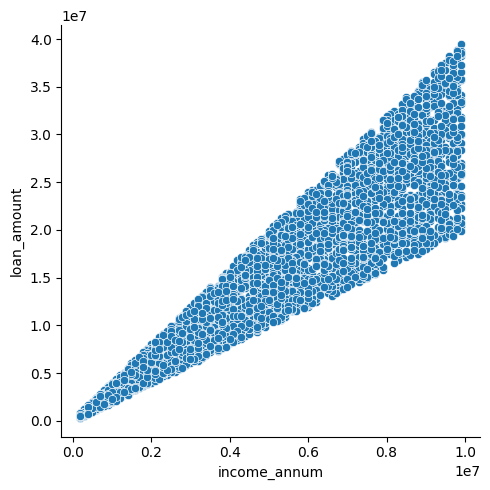

In [60]:
sns.relplot(x='income_annum',y="loan_amount",data=df) 
plt.show()

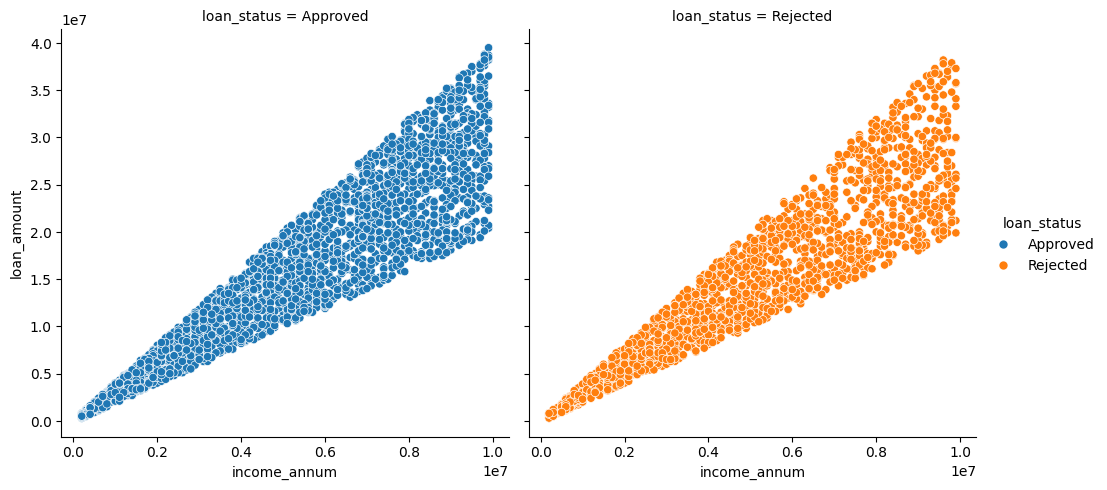

In [61]:
sns.relplot(x='income_annum',y="loan_amount",data=df,hue='loan_status',col='loan_status') 
plt.show()

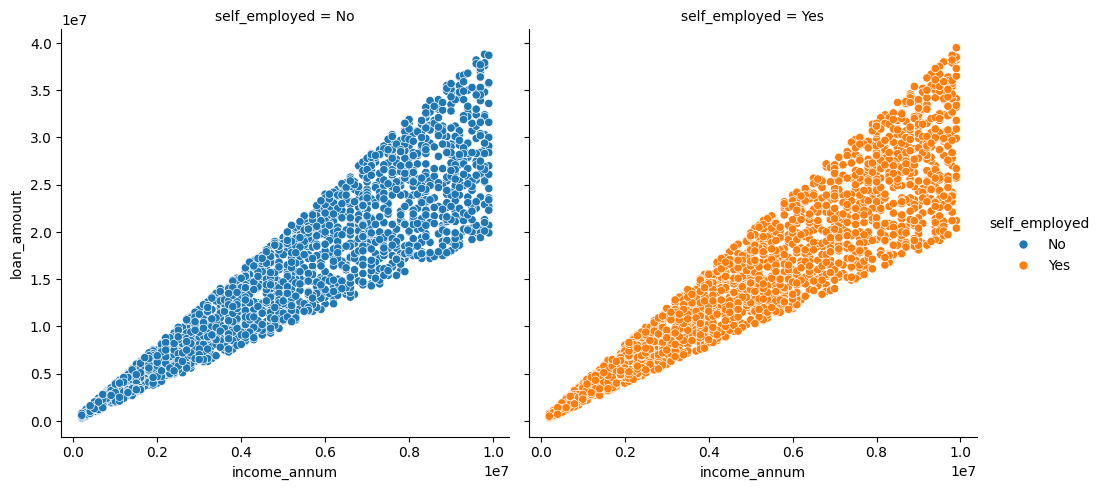

In [62]:
sns.relplot(x='income_annum',y="loan_amount",data=df,hue='self_employed',col='self_employed') 
plt.show()

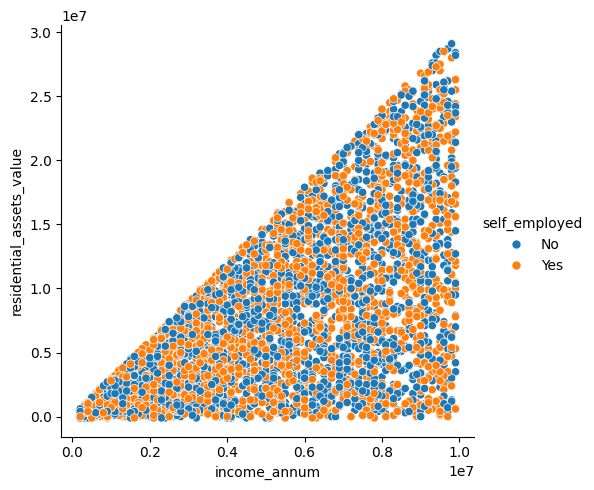

In [63]:
sns.relplot(x='income_annum',y="residential_assets_value",data=df,hue='self_employed',) 
plt.show()

In [64]:
# df['self_employed'].map({"Graduate":1,"Not Graduate":0}) 

In [65]:
df

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4264,4265,5,Graduate,Yes,1000000,2300000,12,317,2800000,500000,3300000,800000,Rejected
4265,4266,0,Not Graduate,Yes,3300000,11300000,20,559,4200000,2900000,11000000,1900000,Approved
4266,4267,2,Not Graduate,No,6500000,23900000,18,457,1200000,12400000,18100000,7300000,Rejected
4267,4268,1,Not Graduate,No,4100000,12800000,8,780,8200000,700000,14100000,5800000,Approved


In [66]:
df3 = pd.get_dummies(df,drop_first='if_binary').astype(int)
df3 

,loan_id,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,education_Not Graduate,self_employed_Yes,loan_status_Rejected
0,1,2,9600000,29900000,12,778,2400000,17600000,22700000,8000000,0,0,0
1,2,0,4100000,12200000,8,417,2700000,2200000,8800000,3300000,1,1,1
2,3,3,9100000,29700000,20,506,7100000,4500000,33300000,12800000,0,0,1
3,4,3,8200000,30700000,8,467,18200000,3300000,23300000,7900000,0,0,1
4,5,5,9800000,24200000,20,382,12400000,8200000,29400000,5000000,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4264,4265,5,1000000,2300000,12,317,2800000,500000,3300000,800000,0,1,1
4265,4266,0,3300000,11300000,20,559,4200000,2900000,11000000,1900000,1,1,0
4266,4267,2,6500000,23900000,18,457,1200000,12400000,18100000,7300000,1,0,1
4267,4268,1,4100000,12800000,8,780,8200000,700000,14100000,5800000,1,0,0


In [67]:
df3.drop('loan_id',axis=1,inplace=True)

In [68]:
# classification , regression   train test split   same  
x = df3.drop('loan_status_Rejected',axis=1)
y = df3[['loan_status_Rejected']]   

In [69]:
### ANN  standard scaled 
from sklearn.preprocessing import StandardScaler 

In [70]:
scaler = StandardScaler()

In [71]:
X = scaler.fit_transform(x)

In [72]:
# training and testing spliting 

In [73]:
from sklearn.model_selection import train_test_split

In [74]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [75]:
# machine learning algorithm from sklearn 
# Tensorflow  &  pytorch  
x_train.shape , y_train.shape 

((3415, 11), (3415, 1))

In [76]:
# !pip install tensorflow  
import tensorflow as tf 

In [77]:
tf.__version__

'2.15.0'

In [78]:
### 
from tensorflow.keras.layers import Dense   # hidden layer 
from tensorflow.keras.models import Sequential

In [80]:
x_train.shape 

(3415, 11)

In [91]:
# ann model define 
ann_model = Sequential() 
ann_model.add(Dense(units=68,activation='relu',input_dim=11,name='hidden1'))
ann_model.add(Dense(units=32,activation='relu',name='hidden2'))
ann_model.add(Dense(units=12,activation='relu',name='hidden3'))

ann_model.add(Dense(units=1,activation='sigmoid',name='outputlayer'))

ann_model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [92]:
ann_model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hidden1 (Dense)             (None, 68)                816       
                                                                 
 hidden2 (Dense)             (None, 32)                2208      
                                                                 
 hidden3 (Dense)             (None, 12)                396       
                                                                 
 outputlayer (Dense)         (None, 1)                 13        
                                                                 
Total params: 3433 (13.41 KB)
Trainable params: 3433 (13.41 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [95]:
# trainin model 
history = ann_model.fit(x_train,y_train,epochs=5,validation_data=(x_test,y_test))


Epoch 1/5
107/107 [==============================] - 1s 12ms/step - loss: 0.1367 - accuracy: 0.9467 - val_loss: 0.1447 - val_accuracy: 0.9555
Epoch 2/5
107/107 [==============================] - 1s 6ms/step - loss: 0.1260 - accuracy: 0.9555 - val_loss: 0.1374 - val_accuracy: 0.9520
Epoch 3/5
107/107 [==============================] - 0s 4ms/step - loss: 0.1196 - accuracy: 0.9552 - val_loss: 0.1265 - val_accuracy: 0.9602
Epoch 4/5
107/107 [==============================] - 0s 5ms/step - loss: 0.1122 - accuracy: 0.9575 - val_loss: 0.1252 - val_accuracy: 0.9567
Epoch 5/5
107/107 [==============================] - 1s 5ms/step - loss: 0.1036 - accuracy: 0.9619 - val_loss: 0.1193 - val_accuracy: 0.9625


In [96]:
ann_model.evaluate(x_train,y_train)  # training 

107/107 [==============================] - 0s 3ms/step - loss: 0.0984 - accuracy: 0.9622


[0.09843268245458603, 0.9622254967689514]

In [97]:
ann_model.evaluate(x_test,y_test)  # testing 


27/27 [==============================] - 0s 3ms/step - loss: 0.1193 - accuracy: 0.9625


[0.11928200721740723, 0.9625293016433716]

In [102]:
import pandas as pd 
import matplotlib.pyplot as plt 

In [100]:
history = pd.DataFrame(history.history)
history

,loss,accuracy,val_loss,val_accuracy
0,0.136689,0.946706,0.144735,0.955504
1,0.125969,0.955490,0.137358,0.951991
2,0.119643,0.955198,0.126511,0.960187
3,0.112209,0.957540,0.125240,0.956674
4,0.103624,0.961933,0.119282,0.962529


<Axes: >

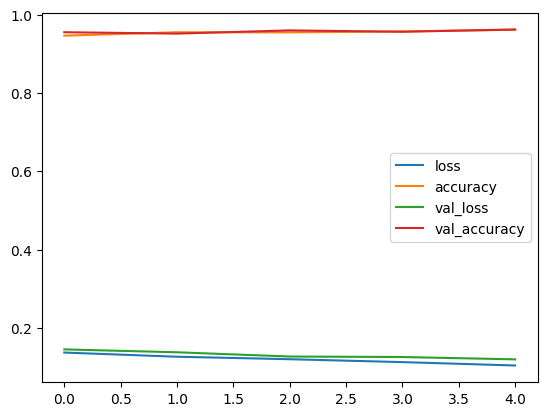

In [101]:
history.plot() 

In [103]:
# model define 
# model train 
# model evaluate 
# prediction 
# model performance 
# model save 


# PREDICTION 

prediction = ann_model.predict(x_test)

27/27 [==============================] - 0s 3ms/step


In [114]:
predictions = (prediction>0.5).astype(int).ravel()
predictions

array([1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,

In [108]:
# if prediction[0][0] > 0.5:
#     print(1)

# else:
#     print(0)# prediction[]


# actul --> y_test 
# prediction = predictions 

# confusion matrix , plot() , classification report 

1


In [115]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

matrix = confusion_matrix(y_test, predictions)
matrix

array([[502,  25],
       [  7, 320]], dtype=int64)

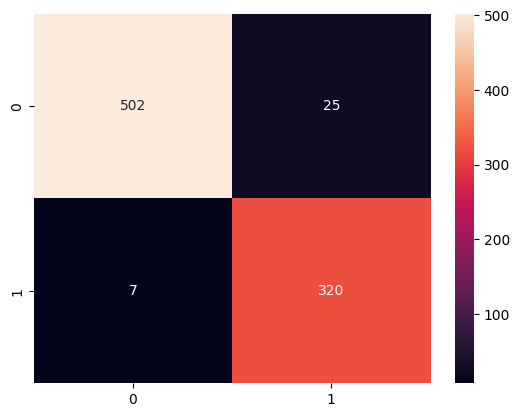

In [118]:
import seaborn as sns 
sns.heatmap(matrix,annot=True,fmt='d')
plt.show()

In [116]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.99      0.95      0.97       527
           1       0.93      0.98      0.95       327

    accuracy                           0.96       854
   macro avg       0.96      0.97      0.96       854
weighted avg       0.96      0.96      0.96       854



In [121]:
# model save 
ann_model.save("ann_model.h5")

C:\Users\Ranjit\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [122]:
import joblib 
joblib.dump(scaler,'scaler.lb')

['scaler.lb']

In [123]:
from tensorflow.keras.models import load_model

In [124]:
model = load_model('ann_model.h5')

In [125]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hidden1 (Dense)             (None, 68)                816       
                                                                 
 hidden2 (Dense)             (None, 32)                2208      
                                                                 
 hidden3 (Dense)             (None, 12)                396       
                                                                 
 outputlayer (Dense)         (None, 1)                 13        
                                                                 
Total params: 3433 (13.41 KB)
Trainable params: 3433 (13.41 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
